# HW 1: Linear Algebra and Floating Point Arithmetic

We recall that the submission of the homeworks has **NO** deadline. You can submit them whenever you want, on Virtuale. You are only required to upload it on Virtuale **BEFORE** your exam session, since the Homeworks will be a central part of the oral exam. 

### Direct Methods for the solution of Linear Systems
1. Given a matrix $A \in \mathbb{R}^{n \times n}$, the vector $x_{true} = (1,1,...,1)^T \in \mathbb{R}^n$, and a value for $n$, write a script that:
    - Computes the right-hand side of the linear system $y = A x_{true}$ (test problem).
    - Computes the condition number in 2-norm of the matrix $A$. It is ill-conditioned? What if we use the $\infty$-norm instead of the 2-norm?
    - Solves the linear system $Ax = y$ with the function `np.linalg.solve()`.
    - Computes the relative error between the computed solution and the true solution $x_{true}$.
    - Plot a graph (using `matplotlib.pyplot`) with the relative errors as a function of $n$ and (in a different window) the condition number in 2-norm and in $\infty$-norm, as a function of $n$.

2. Test the program above with the following choices of $A \in \mathbb{R}^{n \times n}$:
    - A random matrix (created with the function `np.random.rand()`) with size varying in $n = \{10, 20, 30, ..., 100\}$.
    - The Vandermonde matrix (`np.vander`) with dimension $n= \{5,10,15,20,25,30\}$ with respect to the vector $v = {1,2,3,...,n}$.
    - The Hilbert matrix (`scipy.linalg.hilbert`) with dimension $n= \{4, 5, 6, ..., 12\}$.

### Floating point arithmetic

1. The Machine epsilon $\epsilon$ is defined as the smallest floating point number such that it holds: $fl(1 + \epsilon) > 1$. Compute $\epsilon$. *Tips:* use a `while` structure.

2. Let’s consider the sequence $a_n = (1 + \frac{1}{n})^n$. It is well known that: $\lim_{n \to \infty} a_n = e$, where $e$ is the Nepero number. Choose diﬀerent values for $n$, compute $a_n$ and compare it to the real value of the Nepero number. What happens if you choose a large value of $n$?

3. Let’s consider the matrices:

$$
A = \begin{bmatrix} 4 & 2 \\ 1 & 3 \end{bmatrix} \quad B = \begin{bmatrix} 4 & 2 \\ 2 & 1 \end{bmatrix}
$$

Compute the rank of $A$ and $B$ and their eigenvalues. Are $A$ and $B$ full-rank matrices? Can you infer some relationship between the values of the eigenvalues and the full-rank condition? Please, corroborate your deduction with other examples. *Tips:* Please, have a look at `np.linalg`.

In [14]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
n = 10

In [8]:
# Let's build a matrix A and the vector x_true for the system Ax = y, NXN
A  = np.random.rand(n,n)
x_true = np.ones(n)
y = A @ x_true

# It is ill-conditioned? What if we use the &infin; - norm instead of the 2-norm?
# How to Know if a Matrix is Ill-conditioned

An ill-conditioned matrix is one where small changes in the input can cause large changes in the output when solving a system of linear equations. This can be identified by examining the **condition number** of the matrix. 

## Steps to Check if a Matrix is Ill-conditioned

### 1. Calculate the Condition Number
The condition number of a matrix $ A $, often denoted as $ \text{cond}(A) $, measures the sensitivity of the solution of a linear system to changes in the input. It is computed as:

$$
\text{cond}(A) = \|A\| \cdot \|A^{-1}\|
$$

In practice, this is often done using the **2-norm**, which is the ratio of the largest singular value to the smallest singular value of $ A $:

$$
\text{cond}(A) = \frac{\sigma_{\text{max}}}{\sigma_{\text{min}}}
$$

Where:
- $\sigma_{\text{max}}$ is the largest singular value of $ A $
- $\sigma_{\text{min}}$ is the smallest singular value of $ A $

### 2. Interpret the Condition Number
- If $ \text{cond}(A) $ is **large**, the matrix is **ill-conditioned**.
- A matrix is considered ill-conditioned when the condition number is much larger than 1. A rule of thumb is that if $ \text{cond}(A) $ is greater than $ 10^3 $, the matrix is likely ill-conditioned, and numerical solutions to systems involving this matrix may be unstable.


### 3.Signs of Ill-conditioning

- **Small determinant**: If the determinant of a matrix is close to zero, it can indicate near-singularity, which is a sign of ill-conditioning.
- **Instability in linear solutions**: If solving $ Ax = b $ gives significantly different results for small perturbations in $ b $, it could mean the matrix is ill-conditioned.


In [9]:
# Let's compute the condition number in the 2-norm
cond_A = np.linalg.cond(A, 2)
print(f"Condition number of A: {cond_A}")
# 

Condition number of A: 54.84545510260509


In our case the matrix would be moderately ill-conditioned, since is not too high neither close to 1
# What if we use the $\infty$-norm instead of the 2-norm?

In [10]:
cond_A_inf = np.linalg.cond(A, np.inf)
print(f"Condition number of A: {cond_A_inf}")

Condition number of A: 125.77545986790727


In [11]:
x = np.linalg.solve(A, y)
print(f"Error in the solution: {np.linalg.norm(x - x_true)}")

Error in the solution: 4.987361067513563e-15


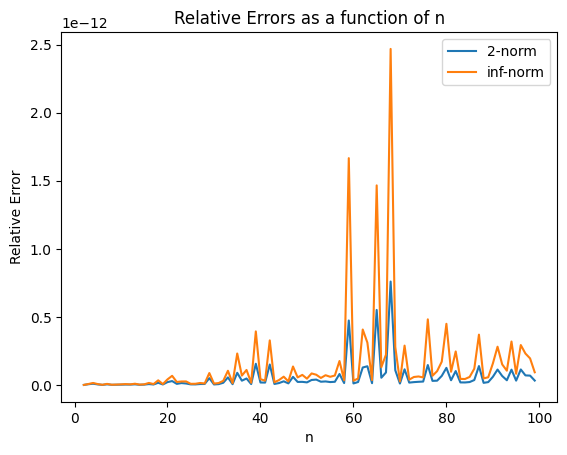

In [16]:
# let's make the graph with the relative errors as function of n
n_values = np.arange(2, 100)
errors = []
errors_inf = []
for n in n_values:
    A = np.random.rand(n,n)
    x_true = np.ones(n)
    y = A @ x_true
    x = np.linalg.solve(A, y)
    errors.append(np.linalg.norm(x - x_true) / np.linalg.norm(x_true))
    errors_inf.append(np.linalg.norm(x - x_true, np.inf) / np.linalg.norm(x_true, np.inf))

plt.plot(n_values, errors, label="2-norm")
plt.plot(n_values, errors_inf, label="inf-norm")
plt.xlabel('n')
plt.ylabel('Relative Error')
plt.title('Relative Errors as a function of n')
plt.legend()
plt.show()

We come to the conclusion that for this case the matrix is not ill-conditioned

# 2. Test the program above with the following choices of $A \in \mathbb{R}^{n \times n}$:
    - A random matrix (created with the function `np.random.rand()`) with size varying in $n = \{10, 20, 30, ..., 100\}$.
    - The Vandermonde matrix (`np.vander`) with dimension $n= \{5,10,15,20,25,30\}$ with respect to the vector $v = {1,2,3,...,n}$.
    - The Hilbert matrix (`scipy.linalg.hilbert`) with dimension $n= \{4, 5, 6, ..., 12\}$.

In [17]:
from scipy.linalg import hilbert

In [18]:
def compute_errors(A, x_true):
    y = A @ x_true
    x = np.linalg.solve(A, y)
    error_2_norm = np.linalg.norm(x - x_true) / np.linalg.norm(x_true)
    error_inf_norm = np.linalg.norm(x - x_true, np.inf) / np.linalg.norm(x_true, np.inf)
    return error_2_norm, error_inf_norm

In [19]:
# Random matrix
n_values_random = np.arange(10, 101, 10)
errors_random = []
errors_inf_random = []
for n in n_values_random:
    A = np.random.rand(n, n)
    x_true = np.ones(n)
    error_2_norm, error_inf_norm = compute_errors(A, x_true)
    errors_random.append(error_2_norm)
    errors_inf_random.append(error_inf_norm)

In [20]:
# Vandermonde matrix
n_values_vander = np.arange(5, 31, 5)
errors_vander = []
errors_inf_vander = []

for n in n_values_vander:
    v = np.arange(1, n+1)
    A = np.vander(v)
    x_true = np.ones(n)
    error_2_norm, error_inf_norm = compute_errors(A, x_true)
    errors_vander.append(error_2_norm)
    errors_inf_vander.append(error_inf_norm)

In [24]:
# Hilbert matrix
n_values_hilbert = np.arange(4, 15)
errors_hilbert = []
errors_inf_hilbert = []

for n in n_values_hilbert:
    A = hilbert(n)
    x_true = np.ones(n)
    error_2_norm, error_inf_norm = compute_errors(A, x_true)
    errors_hilbert.append(error_2_norm)
    errors_inf_hilbert.append(error_inf_norm)

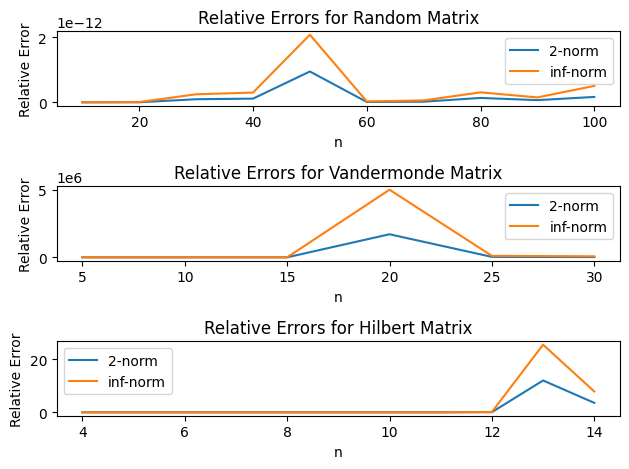

In [25]:
# Random matrix plot
plt.subplot(3, 1, 1)
plt.plot(n_values_random, errors_random, label="2-norm")
plt.plot(n_values_random, errors_inf_random, label="inf-norm")
plt.xlabel('n')
plt.ylabel('Relative Error')
plt.title('Relative Errors for Random Matrix')
plt.legend()

# Vandermonde matrix plot
plt.subplot(3, 1, 2)
plt.plot(n_values_vander, errors_vander, label="2-norm")
plt.plot(n_values_vander, errors_inf_vander, label="inf-norm")
plt.xlabel('n')
plt.ylabel('Relative Error')
plt.title('Relative Errors for Vandermonde Matrix')
plt.legend()

# Hilbert matrix plot
plt.subplot(3, 1, 3)
plt.plot(n_values_hilbert, errors_hilbert, label="2-norm")
plt.plot(n_values_hilbert, errors_inf_hilbert, label="inf-norm")
plt.xlabel('n')
plt.ylabel('Relative Error')
plt.title('Relative Errors for Hilbert Matrix')
plt.legend()

plt.tight_layout()
plt.show()

### Conclusion:
The random matrix is well-conditioned, the hilbert matrix is also partially ill - conditioned and the vandermonde matrix is ill-conditioned

# Floating point arithmetic

1. The Machine epsilon $\epsilon$ is defined as the smallest floating point number such that it holds: $fl(1 + \epsilon) > 1$. Compute $\epsilon$. *Tips:* use a `while` structure.

2. Let’s consider the sequence $a_n = (1 + \frac{1}{n})^n$. It is well known that: $\lim_{n \to \infty} a_n = e$, where $e$ is the Nepero number. Choose diﬀerent values for $n$, compute $a_n$ and compare it to the real value of the Nepero number. What happens if you choose a large value of $n$?

3. Let’s consider the matrices:

$$
A = \begin{bmatrix} 4 & 2 \\ 1 & 3 \end{bmatrix} \quad B = \begin{bmatrix} 4 & 2 \\ 2 & 1 \end{bmatrix}
$$

Compute the rank of $A$ and $B$ and their eigenvalues. Are $A$ and $B$ full-rank matrices? Can you infer some relationship between the values of the eigenvalues and the full-rank condition? Please, corroborate your deduction with other examples. *Tips:* Please, have a look at `np.linalg`.

In [26]:
# compute machine epsilon
epsilon = 1.0
while (1.0 + epsilon) != 1.0:
    epsilon /= 2
epsilon *= 2

print(f"Machine epsilon: {epsilon}")

Machine epsilon: 2.220446049250313e-16


In [31]:
# compute sequence (a_n) = (1 + 1/n)^n and compare to e

# Compute the sequence a_n and compare to e
n_values = [1, 10, 100, 1000, 10000, 100000, 1000000, 10000000, 100000000, 1000000000, 10000000000, 100000000000, 1000000000000, 10000000000000]
a_n_values = [(1 + 1/n)**n for n in n_values]
e = np.exp(1)

for n, a_n in zip(n_values, a_n_values):
    print(f"n = {n}, a_n = {a_n}, difference from e = {abs(a_n - e)}")

n = 1, a_n = 2.0, difference from e = 0.7182818284590451
n = 10, a_n = 2.5937424601000023, difference from e = 0.12453936835904278
n = 100, a_n = 2.7048138294215285, difference from e = 0.01346799903751661
n = 1000, a_n = 2.7169239322355936, difference from e = 0.0013578962234515046
n = 10000, a_n = 2.7181459268249255, difference from e = 0.000135901634119584
n = 100000, a_n = 2.7182682371922975, difference from e = 1.359126674760347e-05
n = 1000000, a_n = 2.7182804690957534, difference from e = 1.359363291708604e-06
n = 10000000, a_n = 2.7182816941320818, difference from e = 1.3432696333026684e-07
n = 100000000, a_n = 2.7182817983473577, difference from e = 3.011168736577474e-08
n = 1000000000, a_n = 2.7182820520115603, difference from e = 2.2355251516614771e-07
n = 10000000000, a_n = 2.7182820532347876, difference from e = 2.2477574246337895e-07
n = 100000000000, a_n = 2.71828205335711, difference from e = 2.248980650598753e-07
n = 1000000000000, a_n = 2.7185234960372378, difference 

## Conclusion
For very large values of (n) (e.g., (n = 10^{12})), the computed (a_n) starts to deviate from (e) again. This is due to the limitations of floating-point arithmetic in representing very large numbers and performing precise calculations.

The results show that there is an optimal range of (n) where the computed (a_n) is very close to (e). For example, (n) values between (10^5) and (10^9) yield very small differences from (e).

# Compute Rank and Eigenvalues of Matrices (A) and (B):

In [32]:
A = np.array([[4, 2], [1, 3]])
B = np.array([[4, 2], [2, 1]])

# Compute rank
rank_A = np.linalg.matrix_rank(A)
rank_B = np.linalg.matrix_rank(B)

# Compute eigenvalues
eigenvalues_A = np.linalg.eigvals(A)
eigenvalues_B = np.linalg.eigvals(B)

print(f"Rank of A: {rank_A}")
print(f"Eigenvalues of A: {eigenvalues_A}")
print(f"Rank of B: {rank_B}")
print(f"Eigenvalues of B: {eigenvalues_B}")

# Check if matrices are full-rank
is_A_full_rank = rank_A == min(A.shape)
is_B_full_rank = rank_B == min(B.shape)

print(f"Is A full-rank? {is_A_full_rank}")
print(f"Is B full-rank? {is_B_full_rank}")

Rank of A: 2
Eigenvalues of A: [5. 2.]
Rank of B: 1
Eigenvalues of B: [5. 0.]
Is A full-rank? True
Is B full-rank? False


# Conclusion
we can infer that since the eigen value of matrix B is 0, we can say, firstly that is a singular matrix(doesn't have an inverse matrix)
- This means that the kernel is not empty, by definition: $ Av = 0$
- if we are talking about a linear system we can say that it has no solution or infinite solutions depending on the right part of the system, for example in the system Ax = y if y is a solution this means the system has infinite solutions, otherwise none
- If one of the eigenvalues is zero, the condition number of the matrix becomes infinite, indicating that the matrix is ill-conditioned or poorly conditioned for numerical calculations. Even small perturbations in the input could cause large changes in the output.